In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

In [2]:
df = pd.read_csv(r"C:\Users\jacar\Documents\Data\Futures (TS) CSV\SPY - 1 min.csv")
df.tail()

,Unnamed: 0,Date,Time,Open,High,Low,Close,Vol,OI
7795,7795,09/08/2021,15:56,450.73,450.81,450.66,450.73,112280,121395
7796,7796,09/08/2021,15:57,450.73,450.83,450.69,450.83,155536,111585
7797,7797,09/08/2021,15:58,450.83,450.83,450.71,450.75,183189,179446
7798,7798,09/08/2021,15:59,450.76,450.81,450.72,450.81,228539,166189
7799,7799,09/08/2021,16:00,450.81,450.98,450.80,450.96,517314,393759


In [3]:
df = df.set_index('Date')[['Close']].tail(8000)
df = df.set_index(pd.to_datetime(df.index))

df.head(1000)

,Close
Date,
2021-08-11,443.79
2021-08-11,443.72
2021-08-11,443.66
2021-08-11,443.68
2021-08-11,443.53
...,...
2021-08-13,445.43
2021-08-13,445.44
2021-08-13,445.41


In [4]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns, index=df.index)
df.head()

,Close
Date,
2021-08-11,0.409384
2021-08-11,0.405279
2021-08-11,0.401760
2021-08-11,0.402933
2021-08-11,0.394135


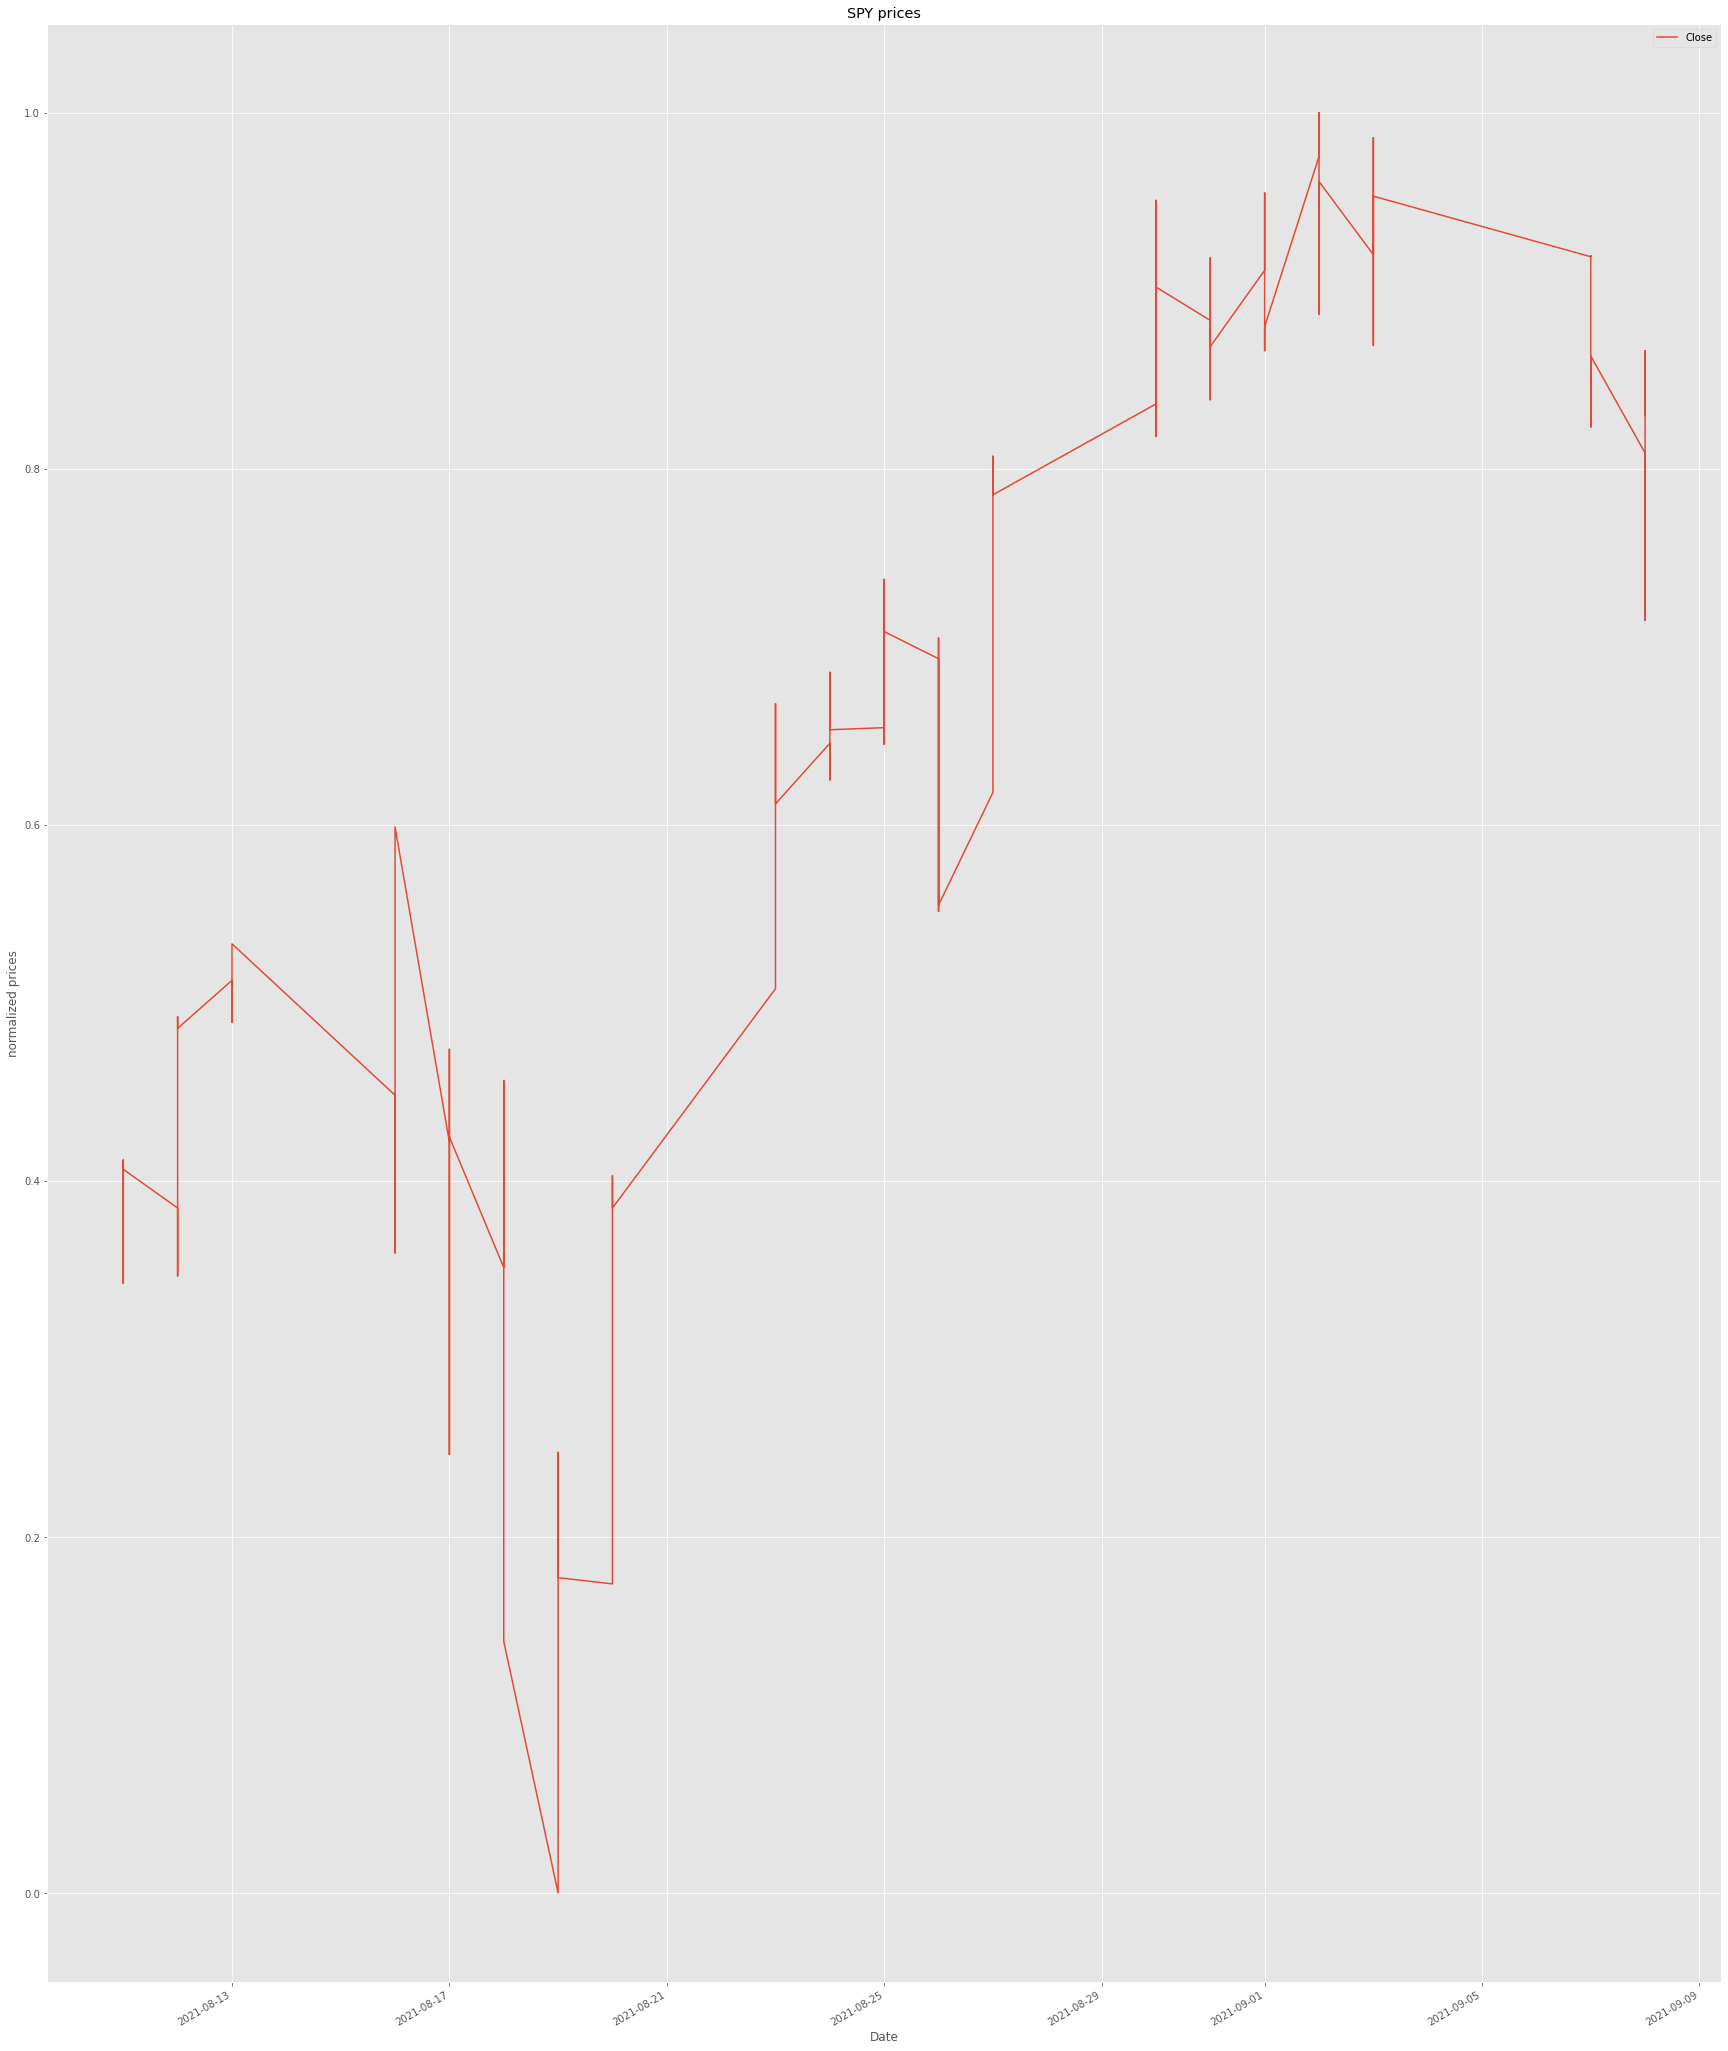

In [5]:
df.plot(figsize=(30,40))
plt.title('SPY prices')
plt.ylabel('normalized prices')
plt.show()

In [6]:
def split_sequences(seq, n_steps_in, n_steps_out): 
    x,y = [], []
    for i in range(len(seq)): 
        end = i+n_steps_in
        out_end = end + n_steps_out
        
        if out_end >len(seq): 
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x), np.array(y)

In [7]:
def visualize_results(results): 
    history = results.history
    plt.figure(figsize=(20,15))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.figure(figsize=(20,15))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [8]:
n_per_in = 100
n_per_out = 390

n_features = 1

X,y = split_sequences(list(df.Close), n_per_in, n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)
print(X.shape)

(7311, 100)
(7311, 100, 1)


In [9]:
model = Sequential()
model.add(LSTM(100, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(100, activation='softsign', return_sequences=True))
model.add(LSTM(100, activation='softsign', return_sequences=True))
model.add(LSTM(100, activation='softsign', return_sequences=True))
model.add(LSTM(100, activation='softsign', return_sequences=True))
model.add(LSTM(100, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 390)               3

In [10]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [11]:
res = model.fit(X,y, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
52/52 [==============================] - 66s 1s/step - loss: 0.1400 - accuracy: 0.0035 - val_loss: 0.0626 - val_accuracy: 0.0000e+00
Epoch 2/100
52/52 [==============================] - 60s 1s/step - loss: 0.0580 - accuracy: 0.0064 - val_loss: 0.0826 - val_accuracy: 0.0000e+00
Epoch 3/100
52/52 [==============================] - 61s 1s/step - loss: 0.0349 - accuracy: 0.0035 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 4/100
52/52 [==============================] - 61s 1s/step - loss: 0.0088 - accuracy: 0.0036 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 5/100
52/52 [==============================] - 63s 1s/step - loss: 0.0086 - accuracy: 0.0047 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 6/100
52/52 [==============================] - 62s 1s/step - loss: 0.0091 - accuracy: 0.0056 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/100
52/52 [==============================] - 61s 1s/step - loss: 0.0082 - accuracy: 0.0056 - val_loss: 0.0040 - val_accura

Epoch 58/100
52/52 [==============================] - 61s 1s/step - loss: 0.0047 - accuracy: 0.0096 - val_loss: 0.0061 - val_accuracy: 0.0191
Epoch 59/100
52/52 [==============================] - 62s 1s/step - loss: 0.0049 - accuracy: 0.0091 - val_loss: 0.0072 - val_accuracy: 0.0014
Epoch 60/100
52/52 [==============================] - 62s 1s/step - loss: 0.0049 - accuracy: 0.0114 - val_loss: 0.0061 - val_accuracy: 0.0014
Epoch 61/100
52/52 [==============================] - 61s 1s/step - loss: 0.0047 - accuracy: 0.0106 - val_loss: 0.0055 - val_accuracy: 0.0041
Epoch 62/100
52/52 [==============================] - 61s 1s/step - loss: 0.0043 - accuracy: 0.0100 - val_loss: 0.0064 - val_accuracy: 0.0014
Epoch 63/100
52/52 [==============================] - 62s 1s/step - loss: 0.0043 - accuracy: 0.0093 - val_loss: 0.0061 - val_accuracy: 0.0027
Epoch 64/100
52/52 [==============================] - 60s 1s/step - loss: 0.0050 - accuracy: 0.0082 - val_loss: 0.0054 - val_accuracy: 0.0041
Epoch 

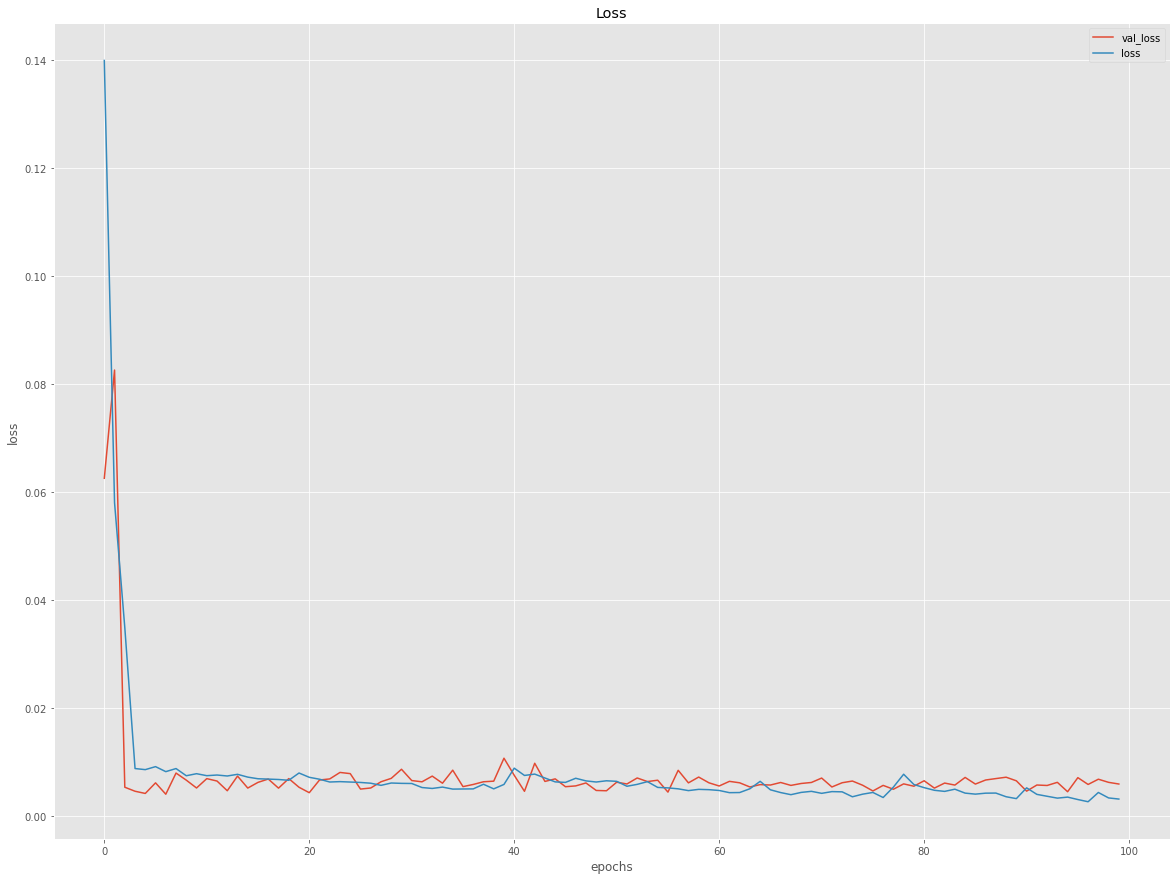

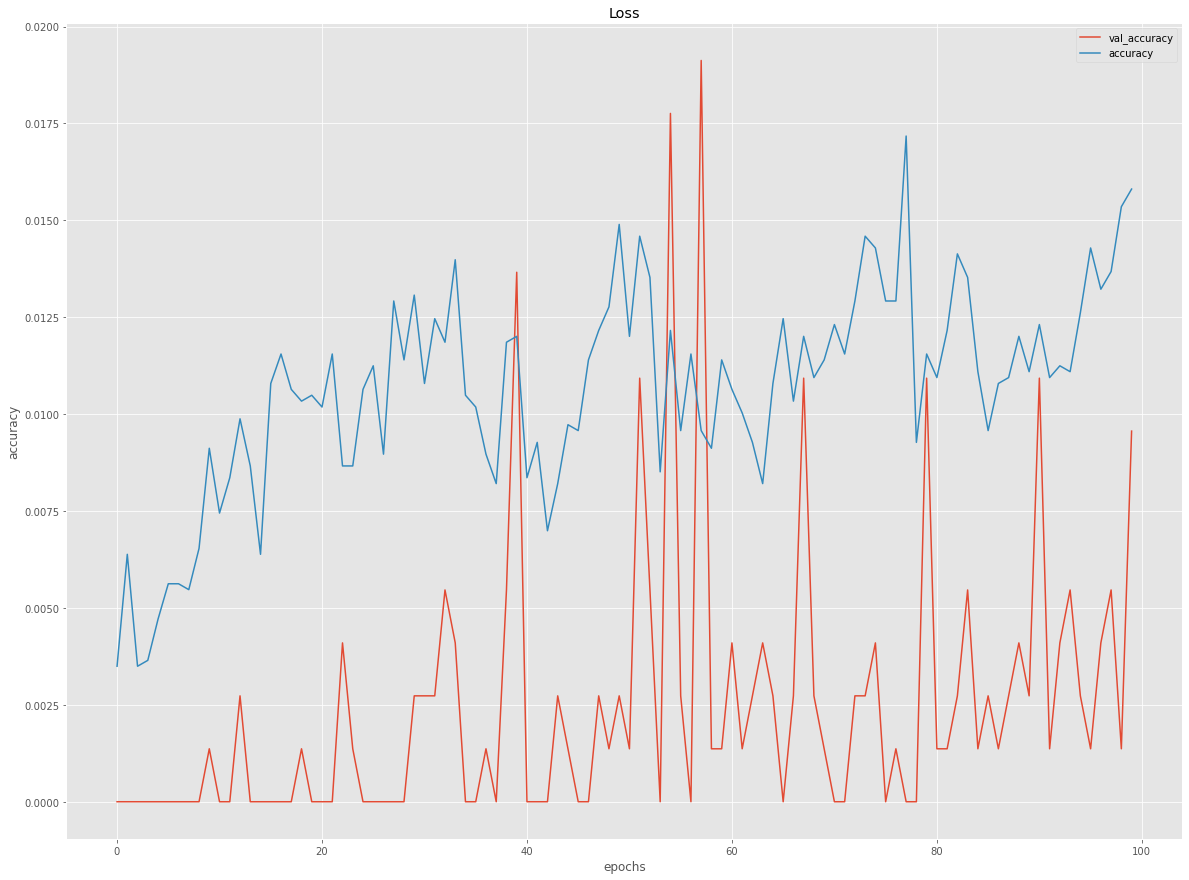

In [12]:
visualize_results(res)

predicted  [[452.3419272607565], [452.3007799422741], [452.3511325365305], [452.32546081304554], [452.3054720109701], [452.3417229926586], [452.3021183556318], [452.3450014448166], [452.3404140508175], [452.3199333792925], [452.3487097746134], [452.33158783972266], [452.3245532935858], [452.3792209243775], [452.2733937895298], [452.342744333148], [452.3299475973845], [452.32852991580967], [452.34955123722557], [452.34377278745177], [452.3451254284382], [452.3539729809761], [452.40525037109853], [452.3719262158871], [452.4306639647484], [452.39452680408954], [452.3456985986233], [452.38046076059345], [452.37770974695684], [452.3685725605488], [452.3773347473145], [452.3676447159052], [452.36596483945846], [452.3429160809517], [452.3388429141045], [452.3836142128706], [452.3450776642561], [452.3235939449072], [452.3137128567696], [452.35855427742007], [452.3533073312044], [452.32948215067387], [452.2943998670578], [452.2896986520291], [452.3089659100771], [452.31667626857757], [452.34206

<function matplotlib.pyplot.show(close=None, block=None)>

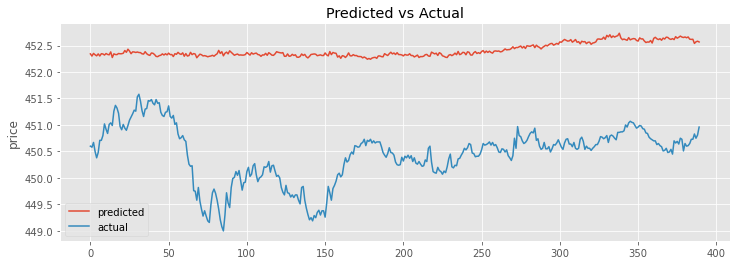

In [13]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label='predicted')

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label='actual')

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show

In [14]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]

In [15]:
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

                          Close
2021-09-08 00:00:00  452.114695
2021-09-08 00:01:00  452.072842
2021-09-08 00:02:00  452.118955
2021-09-08 00:03:00  452.097195
2021-09-08 00:04:00  452.084147
...                         ...
2021-09-08 06:25:00  452.557106
2021-09-08 06:26:00  452.481615
2021-09-08 06:27:00  452.520244
2021-09-08 06:28:00  452.523169
2021-09-08 06:29:00  452.493295

[390 rows x 1 columns]


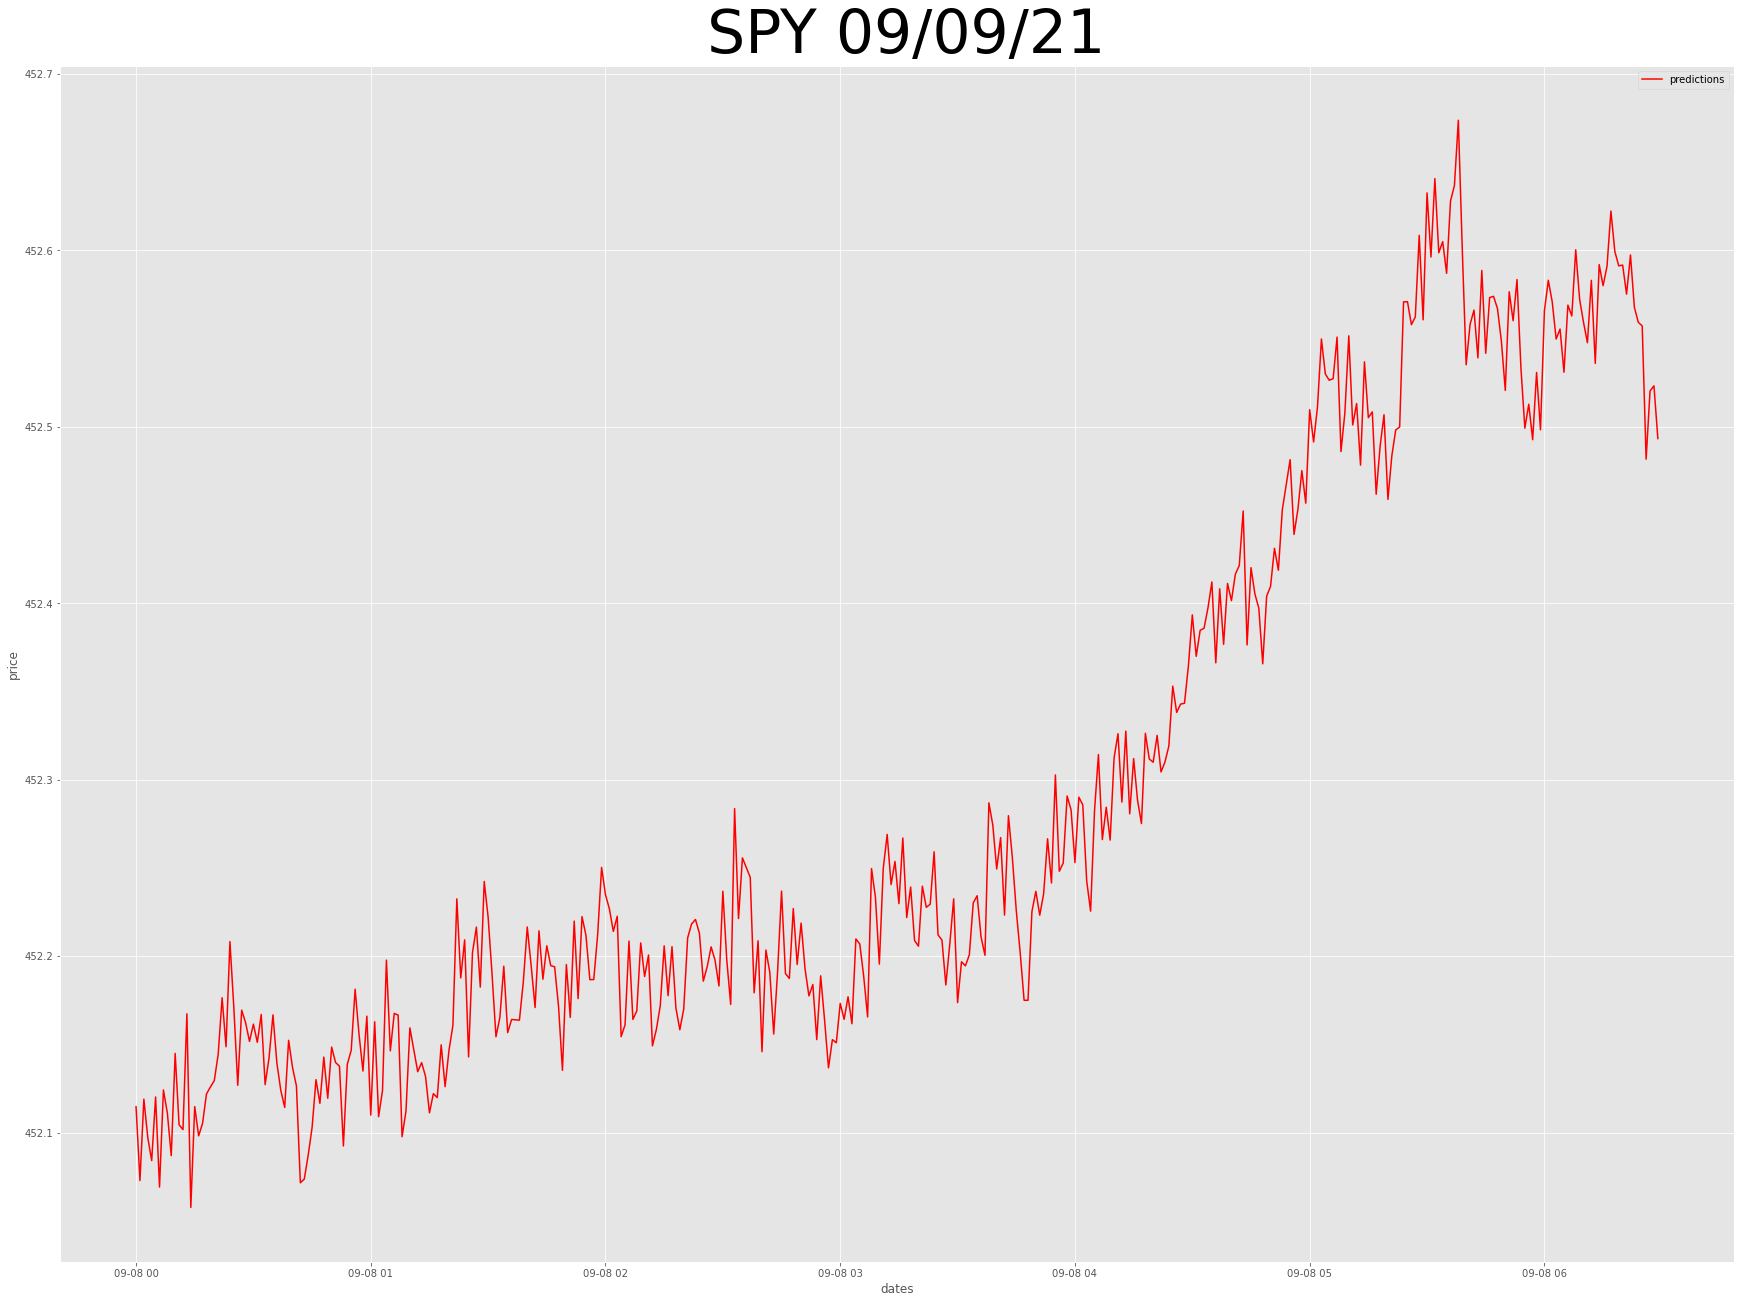

In [16]:
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),freq='1 min'), columns=df.columns)

print(preds)

periods = 390

actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), index=df.Close.tail(periods).index, columns=df.columns).append(preds.head(1))

plt.figure(figsize=(30,22))
#plt.plot(actual, label='actuals', color = 'g')
plt.plot(preds, label='predictions', color = 'r')
plt.ylabel("price")
plt.xlabel("dates")
#plt.title(f' SPY forcasting the next {len(yhat)} minutes')
plt.title(f' SPY 09/09/21', fontsize=60)
plt.legend()
plt.show()
